<a href="https://colab.research.google.com/github/OmarMohammed88/BCDU-Net/blob/master/Models%20/%20CNN%20with%20Clustering%20/%20Feature_Extractor_with_k_means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [1]:
!gdown https://drive.google.com/uc?id=1GTGwWsm2oU89OFWZrCKFYC0LAaY_IOqb

Downloading...
From: https://drive.google.com/uc?id=1GTGwWsm2oU89OFWZrCKFYC0LAaY_IOqb
To: /content/Sample_Pages (1).rar
12.3MB [00:00, 33.8MB/s]


In [ ]:
!mkdir /content/data
!unrar e '/content/Sample_Pages (1).rar'  '/content/data'

In [3]:
import os,glob
images_paths=glob.glob("/content/data/*")


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np


In [5]:
base_model=VGG16(weights='imagenet',pooling="avg")
model = Model(inputs=base_model.input,outputs=base_model.get_layer("block5_pool").output)


553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
model.summary()

In [7]:
listof_np_image = []
for i in images_paths:
  img = image.load_img(i, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  listof_np_image.append(features[0])


In [8]:
from sklearn import preprocessing;
from IPython.display import clear_output;
import gensim;
from gensim.models import KeyedVectors;
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [9]:
def Elbow_k_mean(X):
  distortions = []
  K = range(1,10)
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X.reshape(-1,1))
    distortions.append(kmeanModel.inertia_)
      
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

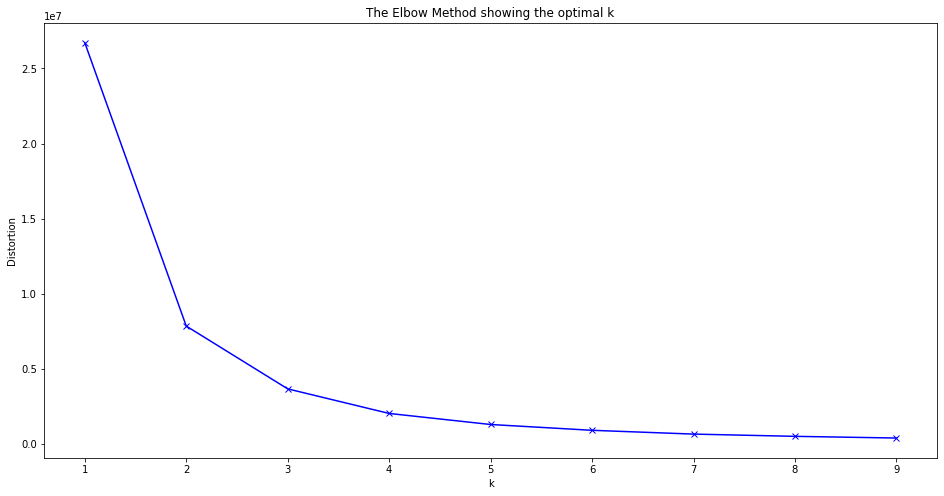

In [10]:
dist = Elbow_k_mean(np.array(listof_np_image))


In [99]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(listof_np_image).reshape(40,-1))

In [100]:
len(kmeans.labels_)

40

In [157]:
class_0 = []
class_1 = []
class_2 =[]
for label,name in zip(kmeans.labels_,images_paths):
  if label==0:
    class_0.append((name,label))
  elif label==1:
    class_1.append((name,label))
  elif label==2:
    class_2.append((name,label))


In [178]:
# images = os.listdir('/content/data')
import numpy as np
import matplotlib.pyplot as plt
import cv2


def plot_images(class_):
  files_class_ = [i[0] for i in class_]

  fig=plt.figure(figsize=(8, 8))
  columns = 4
  rows = 5
  x = 0
  for i in range(1, columns*rows +1):
      img = plt.imread(files_class_[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
      x = x+1
  plt.show()

In [201]:
print(len(class_1))
print(len(class_0))
print(len(class_2))

18
17
4


In [166]:
len(class_2)

4

##Hub Module

In [17]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2

In [4]:
module_hub = hub.KerasLayer("https://tfhub.dev/google/bit/m-r152x4/imagenet21k_classification/1")
# images = ...  # A batch of images with shape [batch_size, height, width, 3].


In [5]:
def hub_module(imag_path):
  feature_list = []
  for img in imag_path:
    img = image.load_img(img, target_size=(224, 224,3))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = module_hub(img)  # Features with shape [batch_size, 2048].
    feature_list.append(features.numpy())
  return np.array(feature_list)


In [11]:
hub_featrues =  hub_module(images_paths)

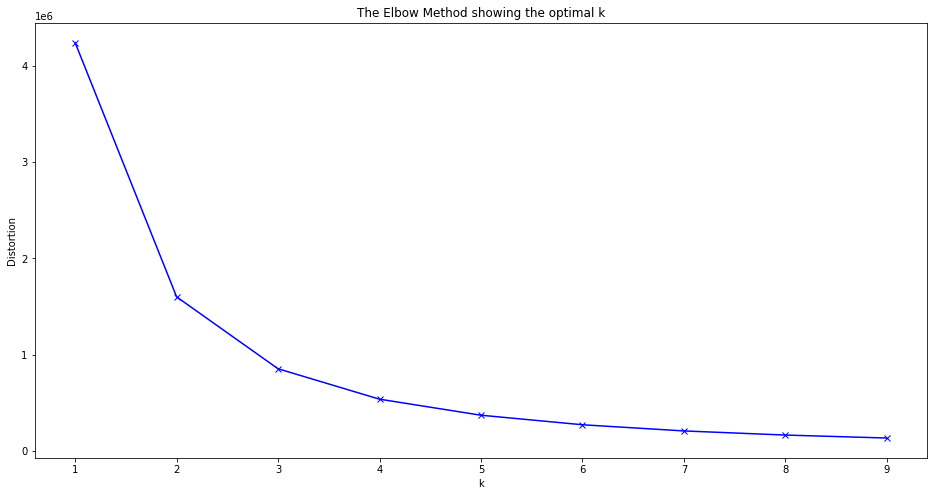

In [12]:
dist_hub = Elbow_k_mean(hub_featrues)


In [13]:
kmeans_hub = KMeans(n_clusters=4, random_state=0).fit(hub_featrues.reshape(40,-1))

In [14]:
hub_class_0 = []
hub_class_1 = []
hub_class_2 = []

for label,name in zip(kmeans_hub.labels_,images_paths):
  if label==0:
    hub_class_0.append((name,label))
  elif label==1:
    hub_class_1.append((name,label))
  elif label==2:
    hub_class_2.append((name,label))


In [15]:
def plot_images(class_):
  fig = plt.figure(1,figsize=(100,100))
  k = 1
  for title in class_:
      ax = fig.add_subplot(len(class_),1,k)
      x=cv2.imread(title[0])
      ax.imshow(x)
      ax.axis('off')
      k += 1

In [ ]:
plot_images(hub_class_0)

In [ ]:
plot_images(hub_class_1)

In [ ]:
plot_images(hub_class_2)

## Vitualization 